In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import dask.dataframe as dd

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].fillna(0)
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat(data_list, axis=0)
data


,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,,,,,,
2023-05-18 14:38:25,1,431109.0,170253.0,1858,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:26,1,431109.0,170253.0,1858,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:27,1,431110.0,170254.0,1859,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:28,1,431112.0,170255.0,1901,2132.0,4.0,680.0,40.0,32.599998,38.599998,0.0,0.56,216.619995,17.635,4.552,4.180,0.595,59.990002,41.0
2023-05-18 14:38:29,1,431113.0,170256.0,1902,2133.0,7.0,680.0,40.0,32.500000,38.599998,0.0,0.56,216.919998,16.782,4.256,4.140,0.584,59.990002,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 20:23:20,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.099998,41.400002,0.0,0.56,221.179993,12.921,2.856,3.848,0.499,60.000000,45.0
2023-07-03 20:23:21,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.200001,41.500000,0.0,0.56,221.009995,12.897,2.840,3.840,0.498,60.000000,45.0
2023-07-03 20:23:22,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.099998,41.400002,0.0,0.56,220.679993,12.899,2.844,3.824,0.499,60.000000,45.0


In [3]:
data.to_parquet("test.parquet", engine="pyarrow")

In [4]:
df = pd.read_parquet('test.parquet')
df

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,,,,,,
2023-05-18 14:38:25,1,431109.0,170253.0,1858,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:26,1,431109.0,170253.0,1858,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:27,1,431110.0,170254.0,1859,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:28,1,431112.0,170255.0,1901,2132.0,4.0,680.0,40.0,32.599998,38.599998,0.0,0.56,216.619995,17.635,4.552,4.180,0.595,59.990002,41.0
2023-05-18 14:38:29,1,431113.0,170256.0,1902,2133.0,7.0,680.0,40.0,32.500000,38.599998,0.0,0.56,216.919998,16.782,4.256,4.140,0.584,59.990002,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 20:23:20,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.099998,41.400002,0.0,0.56,221.179993,12.921,2.856,3.848,0.499,60.000000,45.0
2023-07-03 20:23:21,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.200001,41.500000,0.0,0.56,221.009995,12.897,2.840,3.840,0.498,60.000000,45.0
2023-07-03 20:23:22,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.099998,41.400002,0.0,0.56,220.679993,12.899,2.844,3.824,0.499,60.000000,45.0


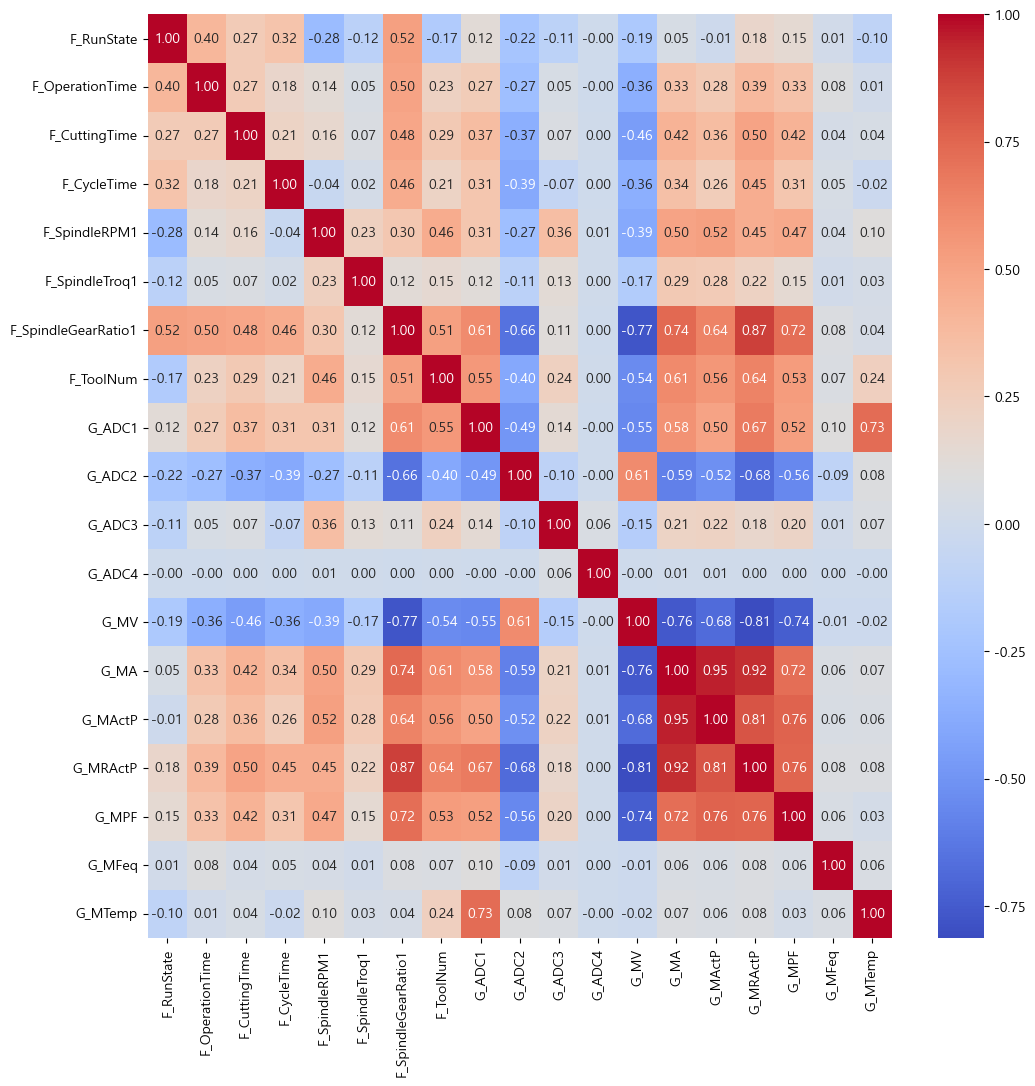

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['G_ADC3']]
y = data['F_RunState']
y = y.map(lambda x: 1 if x == 4 else 0)

In [55]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, stratify=y_train_temp, random_state=42)

dt = DecisionTreeClassifier()
std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_val_sc = std.transform(X_val)
X_test_sc = std.transform(X_test)

In [56]:
start_time = time.time()

dt.fit(X_train_sc, y_train)

end_time = time.time()
print('소요 시간 :', end_time - start_time)

소요 시간 : 0.11377191543579102


In [57]:
p_val = dt.predict(X_val_sc)
p_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, confusion_matrix

print('recall    : ', recall_score(y_val, p_val))
print('precision : ', precision_score(y_val, p_val))
print('f1        : ', f1_score(y_val, p_val))
print('----------------------------------')
print(confusion_matrix(y_val, p_val))
print('----------------------------------')
print(classification_report(y_val, p_val))

recall    :  0.0
precision :  0.0
f1        :  0.0
----------------------------------
[[506689      0]
 [ 25120      0]]
----------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    506689
           1       0.00      0.00      0.00     25120

    accuracy                           0.95    531809
   macro avg       0.48      0.50      0.49    531809
weighted avg       0.91      0.95      0.93    531809



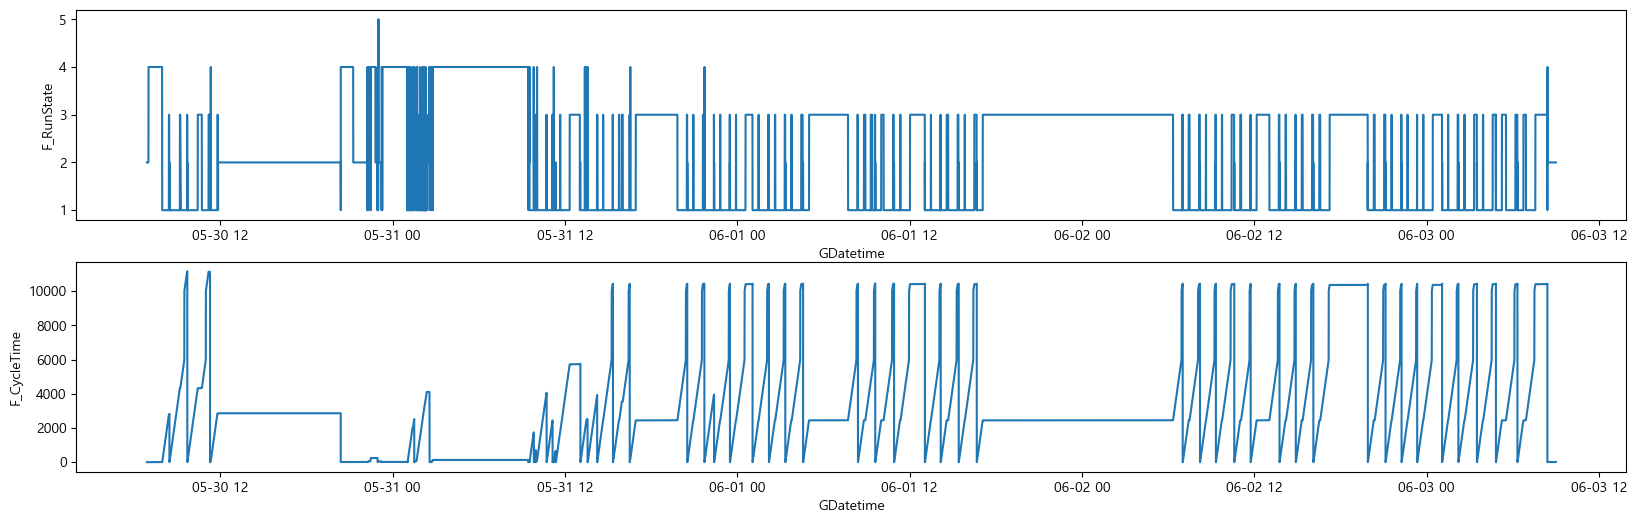

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(20, 6))
sns.lineplot(df3['F_RunState'], ax=ax[0])
sns.lineplot(df3['F_CycleTime'], ax=ax[1])
plt.show()

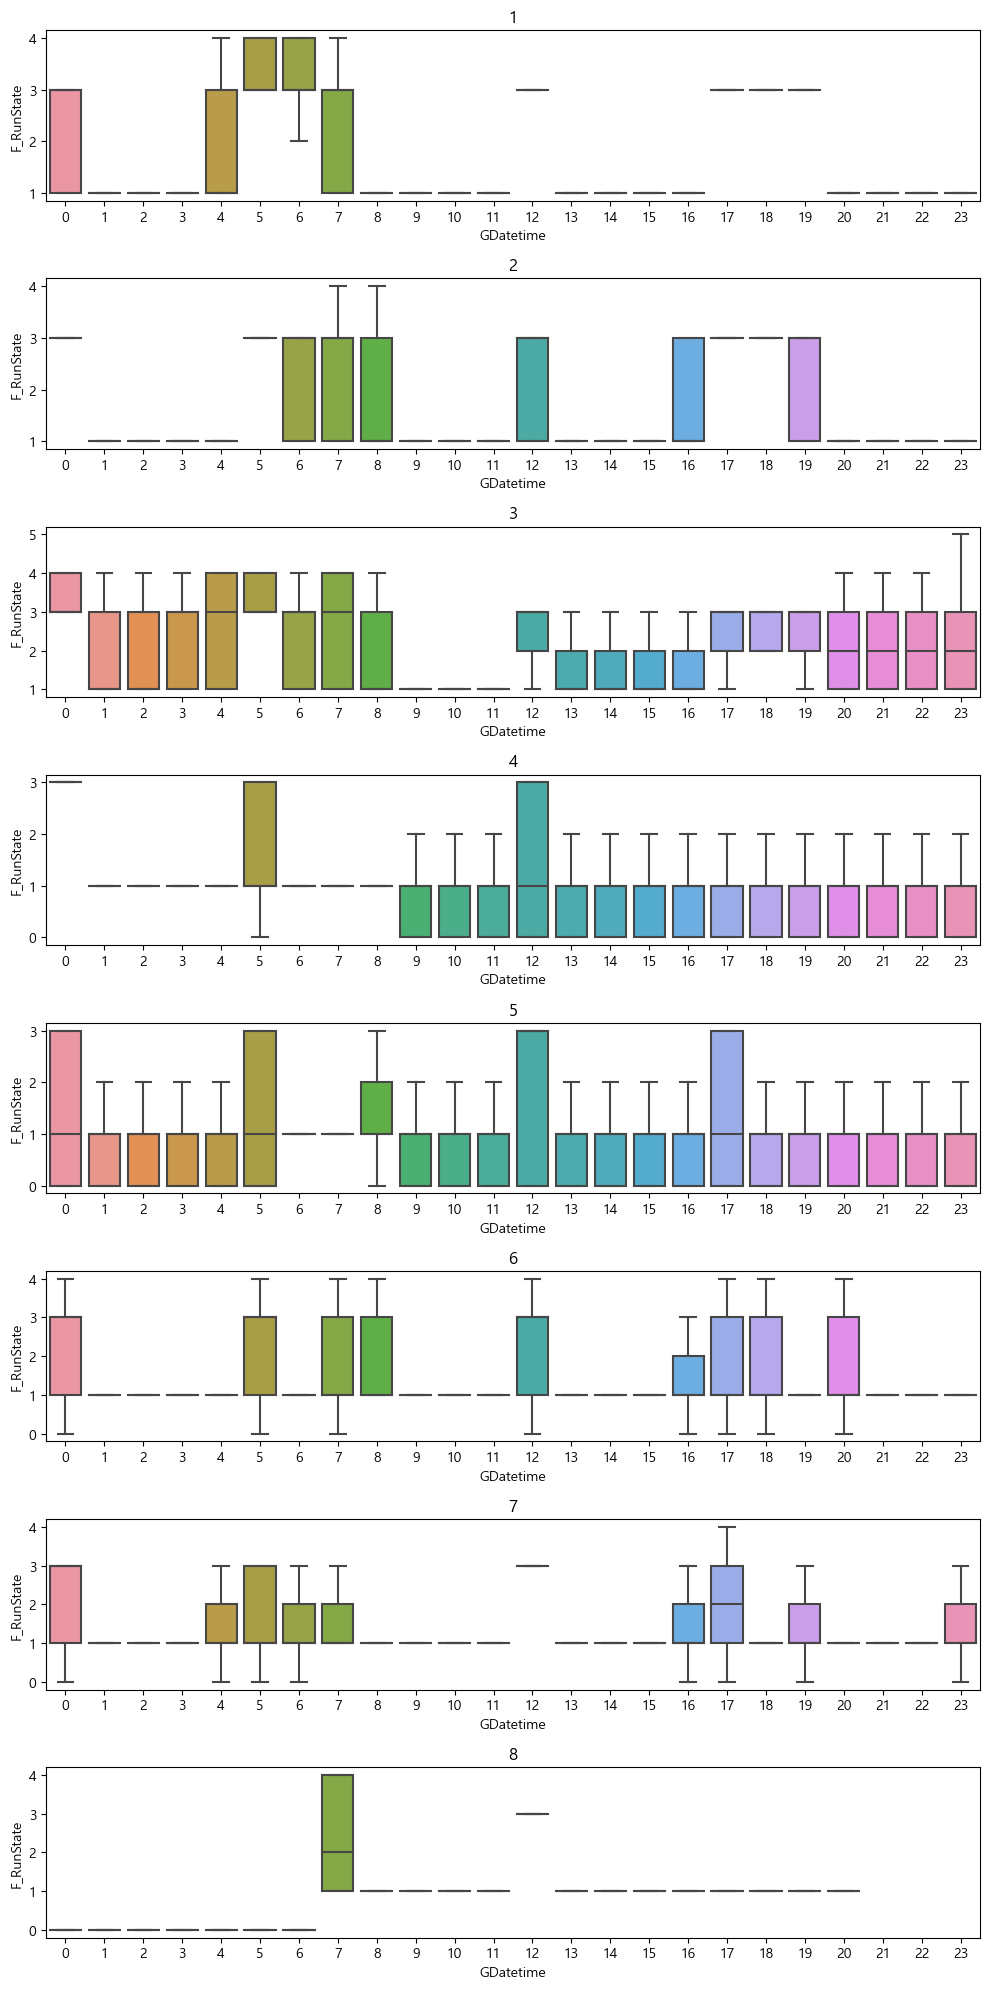

In [10]:
plt.figure(figsize=(10, 20))
for i, df in enumerate(data_list):
    plt.subplot(len(data_list), 1, i+1)
    sns.boxplot(x=df.index.hour.astype('str'), y=df['F_RunState'], order=[str(i) for i in range(24)], showfliers = False)
    plt.title(i+1)
plt.tight_layout()
plt.show()

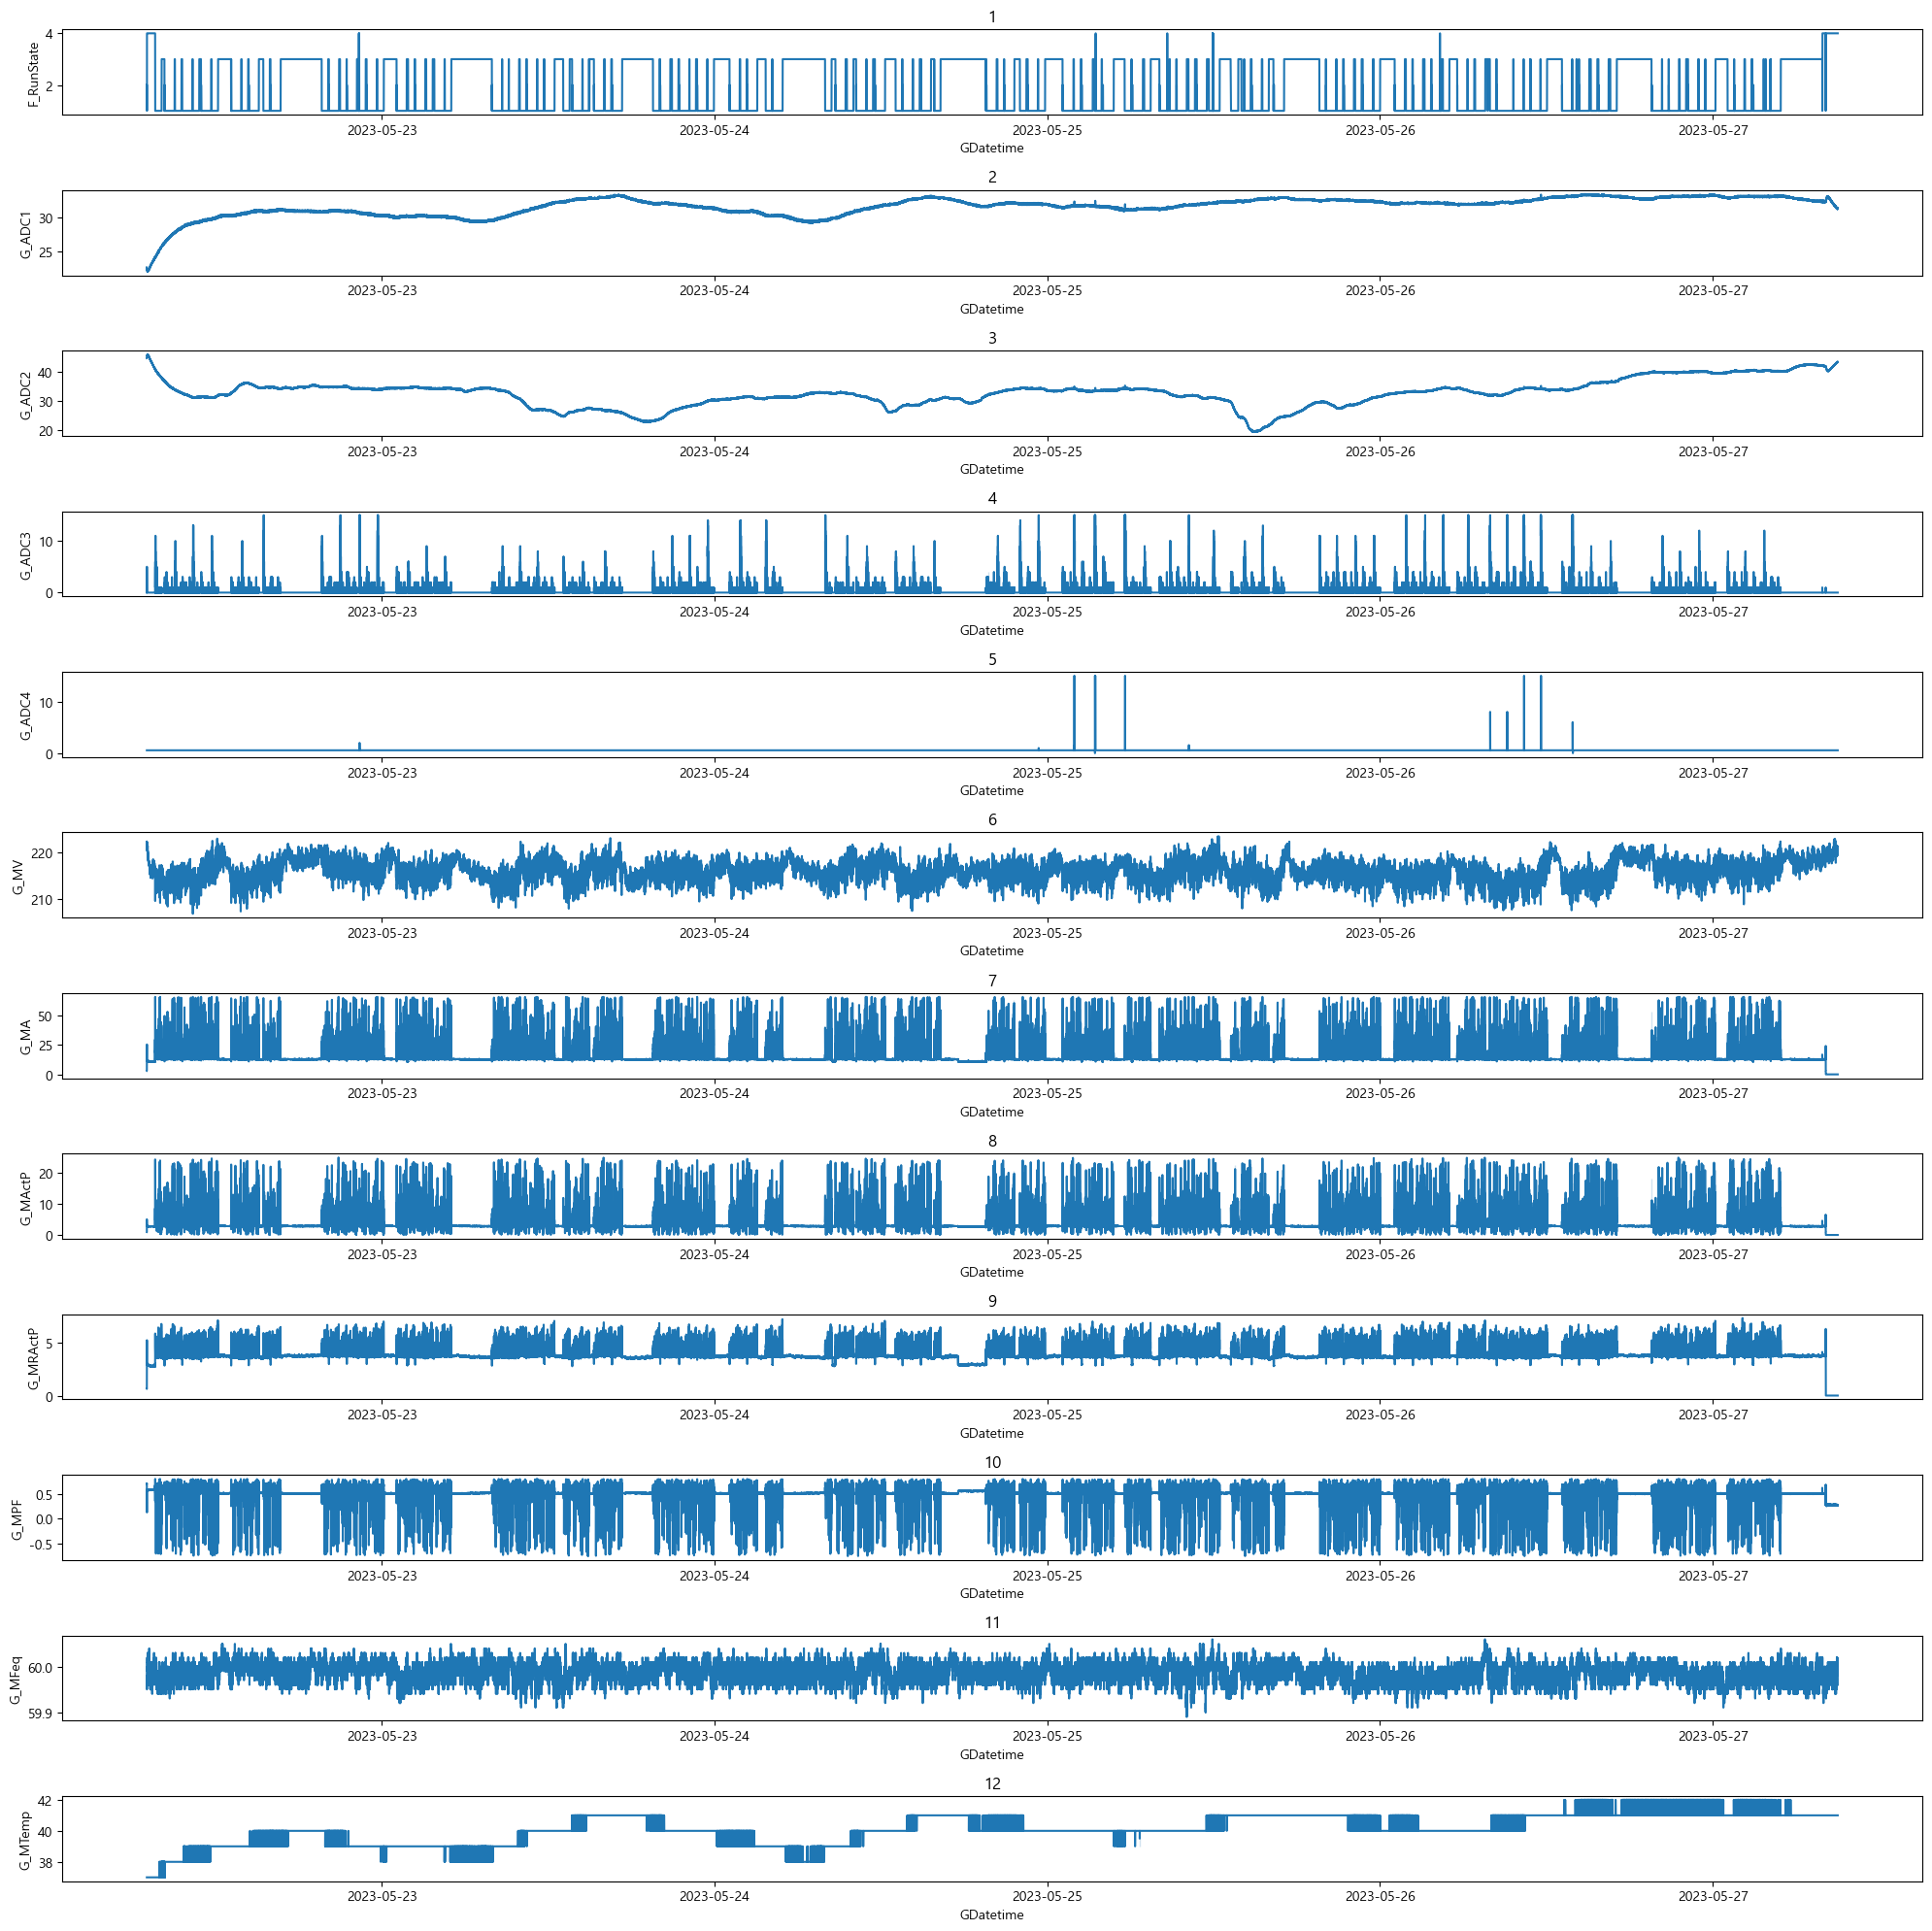

In [15]:
cols_to_select = [0] + list(range(8, data.shape[1]))
selected_data = data.iloc[:, cols_to_select]
plt.figure(figsize=(20,20))
for i, column in enumerate(df2.iloc[:, cols_to_select].columns):
    plt.subplot(len(df2.iloc[:, cols_to_select].columns), 1, i+1)
    sns.lineplot(df2.iloc[:, cols_to_select][column])
    plt.title(i+1)
plt.tight_layout()
plt.show()